In [6]:
import os, sys
sys.path.append(os.path.join(os.path.abspath(''), '../'))

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm
from palettable.scientific.sequential import Oslo_5_r

from misc.normalization import (
    LogNormalizer,
    DummyNormalizer
)
from misc.Directory import getVkPredictRootDir

In [10]:
measured = {}
predicted = {}
measured_base = {}
predicted_base = {}
measured_pilr = {}
predicted_pilr = {}

names = {
    '3060': 'RTX3060',
    '4060': 'RTX4060',
    '1660': 'GTX1660Ti',
    '630': 'UHD630',
    '7900': 'RX7900GRE'
}

for name in names.keys():
    measured[name] = LogNormalizer().invNormalize(np.load(os.path.join(getVkPredictRootDir(), f'validation/{name}_labels.npy')))
    predicted[name] = LogNormalizer().invNormalize(np.load(os.path.join(getVkPredictRootDir(), f'validation/{name}_preds.npy')))
    measured_base[name] = np.load(os.path.join(getVkPredictRootDir(), f'validation/{name}_base_labels.npy'))
    predicted_base[name] = np.load(os.path.join(getVkPredictRootDir(), f'validation/{name}_base_preds.npy'))
    measured_pilr[name] = np.load(os.path.join(getVkPredictRootDir(), f'validation/{name}_pilr_labels.npy'))
    predicted_pilr[name] = np.load(os.path.join(getVkPredictRootDir(), f'validation/{name}_pilr_preds.npy'))


C:\Users\libreliu\AppData\Local\Temp\ipykernel_44468\3660929904.py:12: RuntimeWarning: invalid value encountered in log10
  predicted_log = np.log10(predicted_pilr[key])


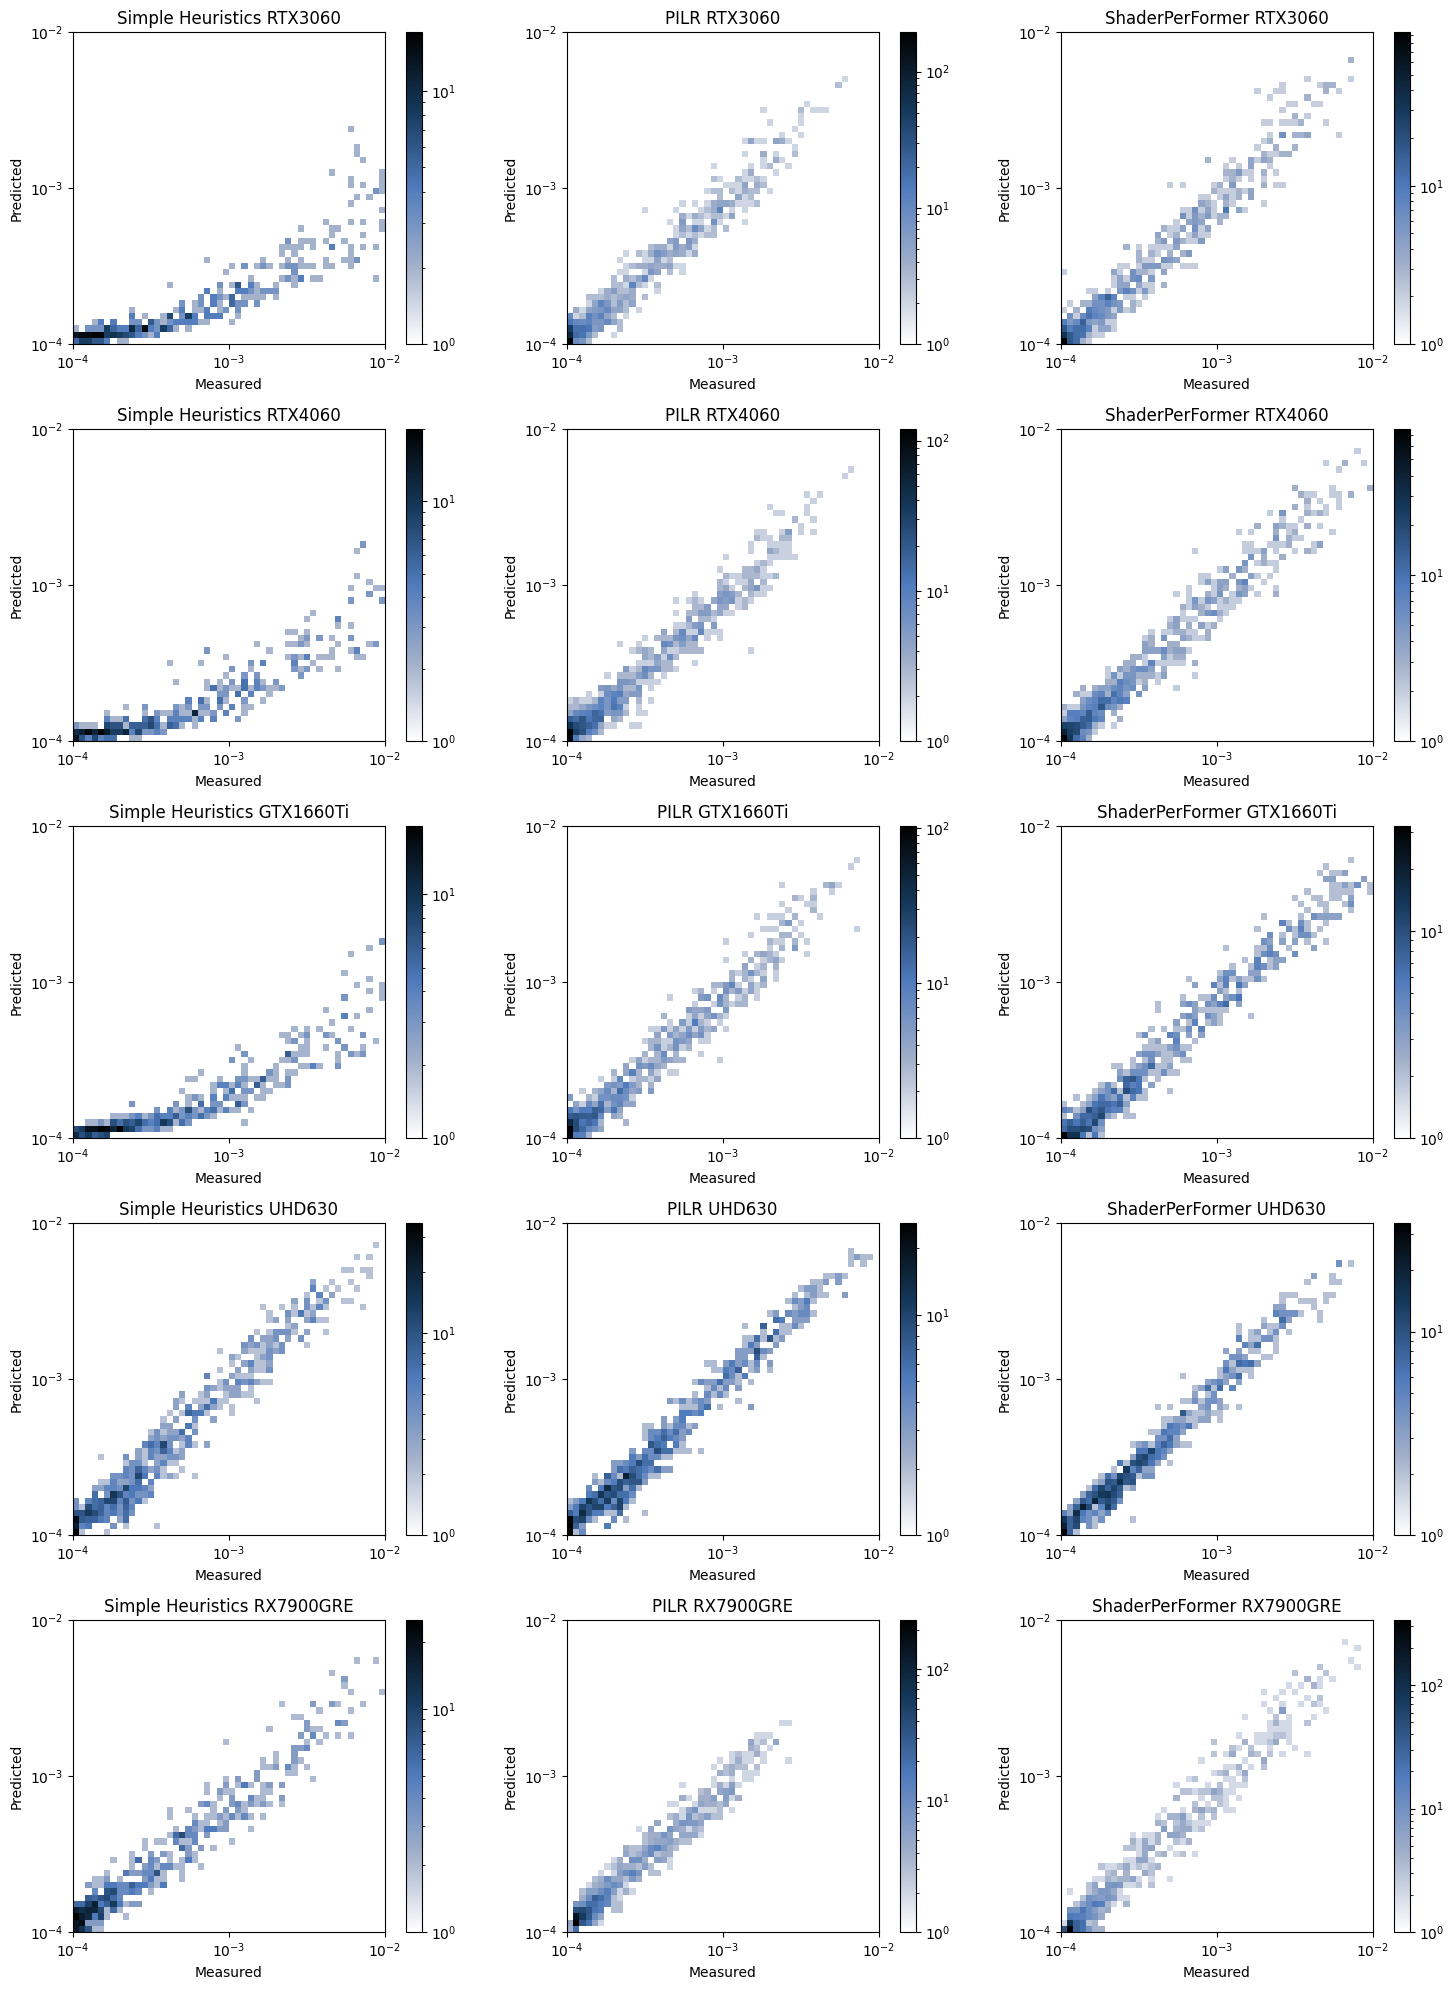

: 

In [21]:
fig, axs = plt.subplots(5, 3, figsize=(15, 20))

for methodIdx in range(0, 3):

    for i, key in enumerate(names.keys()):
        if methodIdx == 0:
            measured_log = np.log10(measured_base[key])
            predicted_log = np.log10(predicted_base[key])
            methodName = "Simple Heuristics"
        elif methodIdx == 1:
            measured_log = np.log10(measured_pilr[key])
            predicted_log = np.log10(predicted_pilr[key])
            methodName = "PILR"
        elif methodIdx == 2:
            measured_log = np.log10(measured[key])
            predicted_log = np.log10(predicted[key])
            methodName = "ShaderPerFormer"
        else:
            assert(False)

        min_val = max(measured_log.min(), predicted_log.min())
        max_val = min(measured_log.max(), predicted_log.max())

        hist, xedges, yedges = np.histogram2d(measured_log, predicted_log, range=[[min_val, max_val], [min_val, max_val]], bins=[50,50])

        im = axs[i, methodIdx].imshow(hist.T, extent=[min_val, max_val, min_val, max_val], origin='lower', cmap=Oslo_5_r.mpl_colormap, norm=LogNorm())
        fig.colorbar(im, ax=axs[i, methodIdx])

        labels = ['10$^{-4}$', '10$^{-3}$', '10$^{-2}$']
        ticks = np.linspace(min_val, max_val, num=len(labels))
        axs[i, methodIdx].set_xticks(ticks)
        axs[i, methodIdx].set_yticks(ticks)
        axs[i, methodIdx].set_xticklabels(labels)
        axs[i, methodIdx].set_yticklabels(labels)

        axs[i, methodIdx].set_xlabel('Measured')
        axs[i, methodIdx].set_ylabel('Predicted')
        axs[i, methodIdx].set_title(f'{methodName} {names[key]}')

plt.tight_layout()
plt.savefig('archHeatmapRefined.svg', format='svg')
plt.show()

In [4]:
measured = np.load(os.path.join(getVkPredictRootDir(),'validation/1660_labels.npy'))
predicted = np.load(os.path.join(getVkPredictRootDir(),'validation/1660_preds.npy'))

measured = LogNormalizer().invNormalize(measured)
predicted = LogNormalizer().invNormalize(predicted)

measured = np.log10(measured)
predicted = np.log10(predicted)

min_val = min(measured.min(), predicted.min())
max_val = min(measured.max(), predicted.max())

hist, xedges, yedges = np.histogram2d(measured, predicted, range=[[min_val, max_val], [min_val, max_val]], bins=[50,50])

im = plt.imshow(hist.T, extent=[min_val, max_val, min_val, max_val], origin='lower', cmap=Oslo_5_r.mpl_colormap, norm=LogNorm())
colorbar = plt.colorbar(im)

labels = ['10$^{-4}$', '10$^{-3}$', '10$^{-2}$']
ticks = np.linspace(-4, -2, num=len(labels))
plt.xticks(ticks, labels)
plt.yticks(ticks, labels)

plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Heatmap of Measured vs Predicted')
plt.show()


NameError: name 'np' is not defined